In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## STEP 1
Using the Scikit-Learn Library train the SVM model on the KDD99 data set to classify Dos vs Non Dos using all of the features at once.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/2024 Spring/ML/Lecture 4/kddcup99_csv.csv')
y = df['label'].apply(lambda x: 0 if x == 'normal' else 1).values # convert y labels into 0 and 1 (non-probe / probe)
X = df.drop('label', axis=1) # include all other features in X

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['protocol_type'] = le.fit_transform(X['protocol_type'])
X['service'] = le.fit_transform(X['service'])
X['flag'] = le.fit_transform(X['flag'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

## STEP 2
Run the SVM model (at least) four times using a different kernel each time using all the features.
Compare the results for each of the kernels.
Discuss the pros and cons of using each of the kernels that you've chosen.




*   **Linear:** $K(x^{(i)}, x^{(j)}) = x^{(i)T} x^{(j)}$ Calculates the dot product of two vectors *xi* and *xj*. It is simple and computationally efficient but cannot capture complex relationships in the data, like the 41 features in this example.
*   **Polynomial:** $K(x^{(i)}, x^{(j)}) = (\gamma x^{(i)T} x^{(j)} + r)^d$ Maps the original data into a polynomial feature space. The degree *d* determines the complexity of the decision boundaries, allowing for more flexible representations of data relationships. It has higher flexibility than linear kernel, but is prone to overfitting if the degree is too high.
- **RBF (Radial Basis Function):** $K(x^{(i)}, x^{(j)}) = \exp\left(-\gamma \|x^{(i)} - x^{(j)}\|^2\right)$ Maps the input features into an infinite-dimensional space, which is particularly useful for handling non-linear relationships. The parameter *γ* controls the width of the Gaussian bell shape, influencing the smoothness of the decision regions. It works well with linearly inseparable data, but computationally expensive and is sensitive to hyperparameter gamma. It gives the best result in this example, and is the most commonly used kernel for SVM.
- **Sigmoid:** $K(x^{(i)}, x^{(j)}) = \tanh(\gamma x^{(i)T} x^{(j)} + r)$ Resembles the sigmoid activation function used in neural networks, mapping the original data into a space between -1 and 1. The parameters *γ* (scale) and *r* (offset) adjust the shape of the sigmoid function, allowing for a range of non-linear transformations. It might not be as effective as the RBF kernel, and the non-positive values could cause problems. Its accuracy is also the lowest in this example.



In [ ]:
# Linear
svm_linear = SVC(kernel='linear', random_state=1)
svm_linear.fit(X_train_std, y_train)
svm_linear.score(X_test_std, y_test)

0.997449495971823

In [ ]:
# Polynomial
svm_poly = SVC(kernel='poly', random_state=1)
svm_poly.fit(X_train_std, y_train)
svm_poly.score(X_test_std, y_test)

0.9992814056111089

In [ ]:
# Radial Basis Function
svm_rbf = SVC(kernel='rbf', random_state=1)
svm_rbf.fit(X_train_std, y_train)
svm_rbf.score(X_test_std, y_test)

0.9993623739929558

In [ ]:
# Sigmoid
svm_sigmoid = SVC(kernel='sigmoid', random_state=1)
svm_sigmoid.fit(X_train_std, y_train)
svm_sigmoid.score(X_test_std, y_test)

0.9500425084004697

## STEP 3
Pick two features which you think are important for this problem. Train SVM model using only those two features and visualize the decision boundary. Do this for linear kernel and RBF kernel only. You may want to subsample the training data substantially in order to get a good visualization within a reasonable time. Discuss your observations.



*   I chose 'lsu_attempted' and 'count' as the two features because they were highly ranked in last week's assignment. While both the linear and RBF models show high accuracy (0.9797979797979798) and appear to perform similarly, the graphs reveal significant differences.

*  Despite 'lsu_attempted' having only the values [0, 1], with the data for 1 being relatively scarce and less conspicuous, the linear model appears to be more susceptible to overfitting given the dataset. As a result, the linear model's outcomes on the test datasets do not seem plausible. The RBF model demonstrates better performance in this way.



In [ ]:
interval = 1000
selected_X_train = X_train[['lnum_compromised', 'count']].iloc[::interval, :].values
selected_X_test = X_test[['lnum_compromised', 'count']].iloc[::interval, :].values
selected_y_train = y_train[::interval]
selected_y_test = y_test[::interval]
selected_X_train.shape, selected_y_train.shape

((396, 2), (396,))

In [ ]:
np.unique(X_train[['lnum_compromised']].iloc[::interval, :].values)

array([0, 1])

In [ ]:
# Linear
svm_linear_selected = SVC(kernel='linear', random_state=1)
svm_linear_selected.fit(selected_X_train, selected_y_train)
svm_linear_selected.score(selected_X_test, selected_y_test)

0.9797979797979798

In [ ]:
# Radial Basis Function
svm_rbf_selected = SVC(kernel='rbf', random_state=1)
svm_rbf_selected.fit(selected_X_train, selected_y_train)
svm_rbf_selected.score(selected_X_test, selected_y_test)

0.9797979797979798

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.3,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

#### Linear

In [ ]:
svm_linear_selected = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear_selected.fit(selected_X_train, selected_y_train)

SVC(kernel='linear', random_state=1)

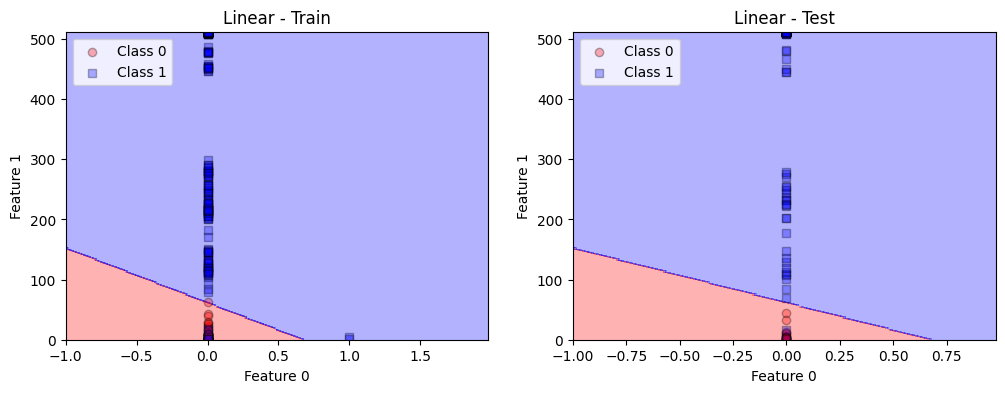

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
plot_decision_regions(selected_X_train, selected_y_train, svm_linear_selected)
ax[0].set_title('Linear - Train')
ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')
ax[0].legend(loc='upper left')

plt.sca(ax[1])
plot_decision_regions(selected_X_test, selected_y_test, svm_linear_selected)
ax[1].set_title('Linear - Test')
ax[1].set_xlabel('Feature 0')
ax[1].set_ylabel('Feature 1')
ax[1].legend(loc='upper left')

plt.show()

#### RBF

In [ ]:
svm_rbf_selected = SVC(kernel='rbf', C=1.0, random_state=1)
svm_rbf_selected.fit(selected_X_train, selected_y_train)

SVC(random_state=1)

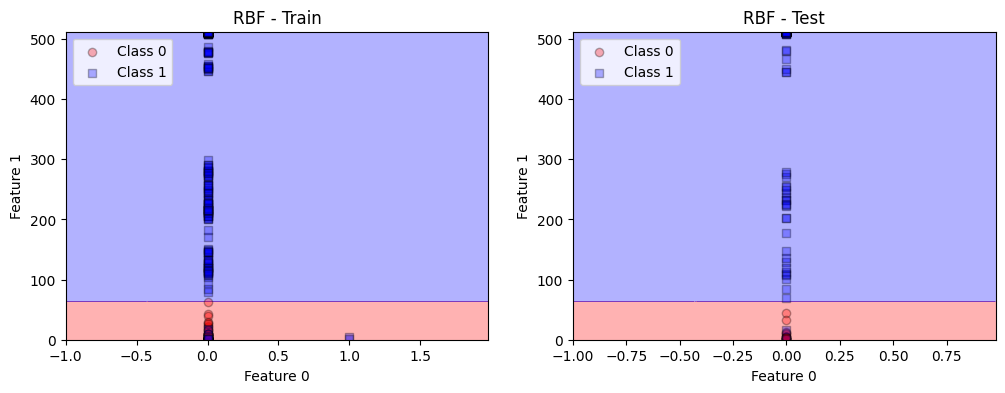

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
plot_decision_regions(selected_X_train, selected_y_train, svm_rbf_selected)
ax[0].set_title('RBF - Train')
ax[0].set_xlabel('Feature 0')
ax[0].set_ylabel('Feature 1')
ax[0].legend(loc='upper left')

plt.sca(ax[1])
plot_decision_regions(selected_X_test, selected_y_test, svm_rbf_selected)
ax[1].set_title('RBF - Test')
ax[1].set_xlabel('Feature 0')
ax[1].set_ylabel('Feature 1')
ax[1].legend(loc='upper left')

plt.show()